<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exericse_9_8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8- analogous to task 3 but plotting the R2 coefficient instead of accuracy.

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 1) # we fix this at 1
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

In [ ]:
# We prepare the X matrix and y vector, and we scale X
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# We create the train-test split by hand
train_indices = list(range(0,90))
test_indices = list(range(90,100))
# We combine both splits into one variable
split = [(train_indices, test_indices)] # for one fold

In [ ]:
%%capture
# We prepare the MLPRegressor model with the parameters we want fixed
mlp = MLPRegressor(max_iter=1000, random_state=42)
# We create a variable containing the parameter space we want to explore
parameters = {'activation': ('identity', 'logistic', 'tanh', 'relu'), 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0]}
# We call the GridSearch estimator
clf = GridSearchCV(mlp,parameters,cv=split,return_train_score=True)
# We fit the GridSearch estimator on our data
clf.fit(X_scaled, y)

In [ ]:
# We store the results into a pandas dataframe
NN = pd.DataFrame(clf.cv_results_)

In [ ]:
# We retrieve the two columns of interest 
test_scores = np.array(NN["split0_test_score"])
train_scores = np.array(NN["split0_train_score"])

In [ ]:
# We divide the test data according to activation functions
a = test_scores[0:5]
b = test_scores[5:10]
c = test_scores[10:15]
d = test_scores[15:20]

In [ ]:
# We divide the training data according to activation functions
f = train_scores[0:5]
g = train_scores[5:10]
h = train_scores[10:15]
i = train_scores[15:20]

In [ ]:
# We regroup the results
test_test_scores = np.array([a,b,c,d])
train_train_scores = np.array([f,g,h,i])

In [ ]:
# We reshape the results 
test_test_scores = np.reshape(test_test_scores,(5, 4))
train_train_scores = np.reshape(train_train_scores,(5, 4))

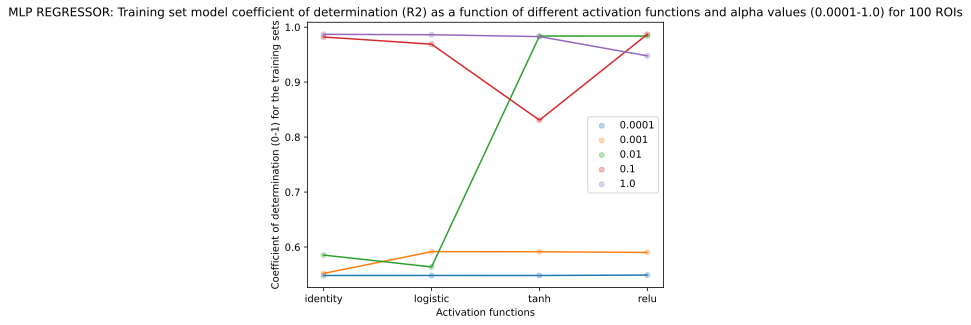

In [ ]:
# We're ready to plot the training scores
act_funs = list(range(1,5))
lab = ['0.0001', '0.001', '0.01', '0.1', '1.0']
plt.style.use("default")
plt.scatter(act_funs,train_train_scores[0], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[1], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[2], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[3], s=25, alpha = 0.3, marker = 'o')
plt.scatter(act_funs,train_train_scores[4], s=25, alpha = 0.3, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP REGRESSOR: Training set model coefficient of determination (R2) as a function of different activation functions and alpha values (0.0001-1.0) for 100 ROIs",
    xlabel="Activation functions",
    ylabel="Coefficient of determination (0-1) for the training sets",
    xticks = act_funs,
    xticklabels = ('identity','logistic','tanh','relu')
)
plt.plot(act_funs,train_train_scores[0])
plt.plot(act_funs,train_train_scores[1])
plt.plot(act_funs,train_train_scores[2])
plt.plot(act_funs,train_train_scores[3])
plt.plot(act_funs,train_train_scores[4])
plt.show()

We clearly see that the smaller learning rates do not yield good model performance in the training phase. When the learning rate is high enough, ReLU performs very well and tanh performs quite well. 

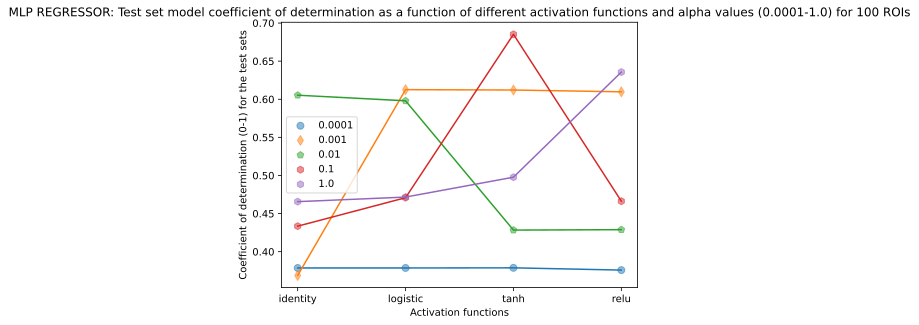

In [ ]:
# We're ready to plot the test scores
act_funs = list(range(1,5))
lab = ['0.0001', '0.001', '0.01', '0.1', '1.0']
plt.style.use("default")
plt.scatter(act_funs,test_test_scores[0], s=50, alpha = 0.5, marker = 'o')
plt.scatter(act_funs,test_test_scores[1], s=50, alpha = 0.5, marker = 'd')
plt.scatter(act_funs,test_test_scores[2], s=50, alpha = 0.5, marker = 'p')
plt.scatter(act_funs,test_test_scores[3], s=50, alpha = 0.5, marker = 'h')
plt.scatter(act_funs,test_test_scores[4], s=50, alpha = 0.5, marker = 'h')
plt.legend(labels=(lab))
plt.gca().set(
    title="MLP REGRESSOR: Test set model coefficient of determination as a function of different activation functions and alpha values (0.0001-1.0) for 100 ROIs",
    xlabel="Activation functions",
    ylabel="Coefficient of determination (0-1) for the test sets",
    xticks = act_funs,
    xticklabels = ('identity','logistic','tanh','relu')
)
plt.plot(act_funs,test_test_scores[0])
plt.plot(act_funs,test_test_scores[1])
plt.plot(act_funs,test_test_scores[2])
plt.plot(act_funs,test_test_scores[3])
plt.plot(act_funs,test_test_scores[4])
plt.show()

The lowest learning rate still yields very poor performance. However, the logistic function does fairly well with rates of 0.001 and 0.01. Tanh does especially well with an alpha of 0.1, second only to ReLU with a lr of 1.